# ML Project
## 2022-2023
---


* Tellili Eya 
* Ben Cheikh Larbi Malak
* Gharbi Maryem



**Bib import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Lecture des fichiers *train_Insurance.csv* & *test_Insurance.csv***


In [55]:
train_data = pd.read_csv('train_Insurance.csv')
test_data = pd.read_csv('test_Insurance.csv')

---

### **Data analysis** 

In [3]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [4]:
train_data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code',
       'Claim'],
      dtype='object')

In [5]:
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


In [6]:
print("Taille du jeu de données: ",train_data.shape)

Taille du jeu de données:  (5012, 13)


In [7]:
print("Les types des colonnes: ",train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB
Les types des colonnes:  None


In [8]:
train_data.Claim.value_counts()

non    3886
oui    1126
Name: Claim, dtype: int64

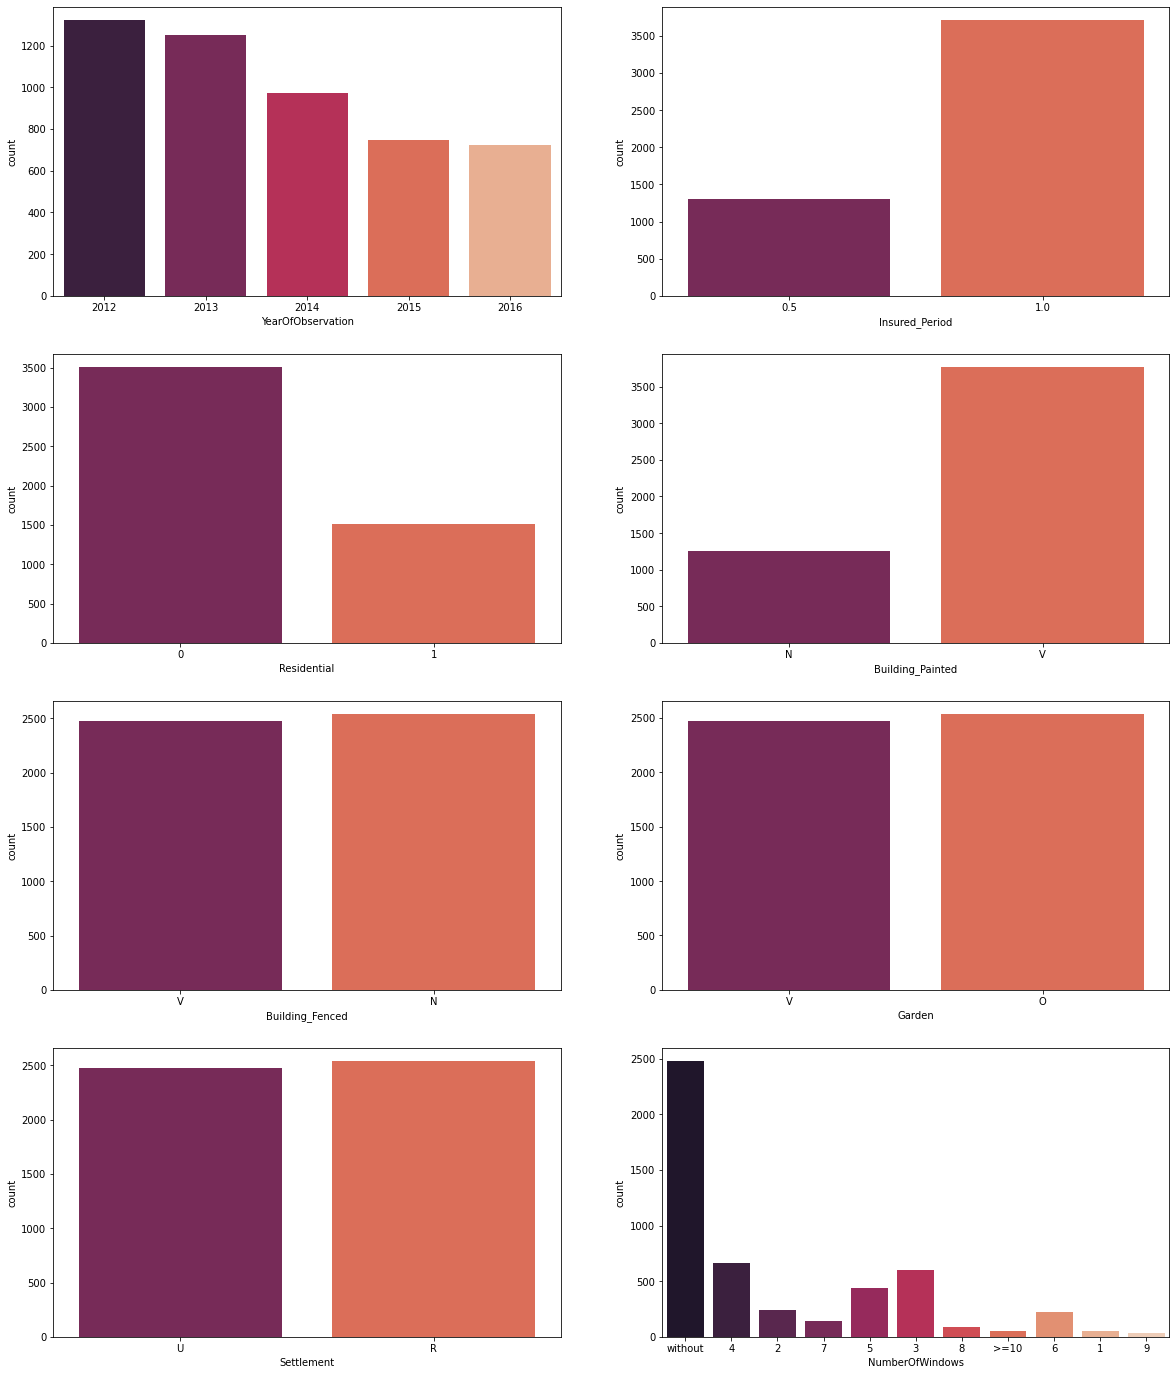

In [9]:
l_columns =["YearOfObservation","Insured_Period","Residential","Building_Painted","Building_Fenced","Garden","Settlement","NumberOfWindows"]
plt.figure(figsize=(20,50))
for i,c in enumerate(l_columns):
    plt.subplot(8,2,i+1)
    sns.countplot(x=train_data[c],palette="rocket")
    
    
plt.show()

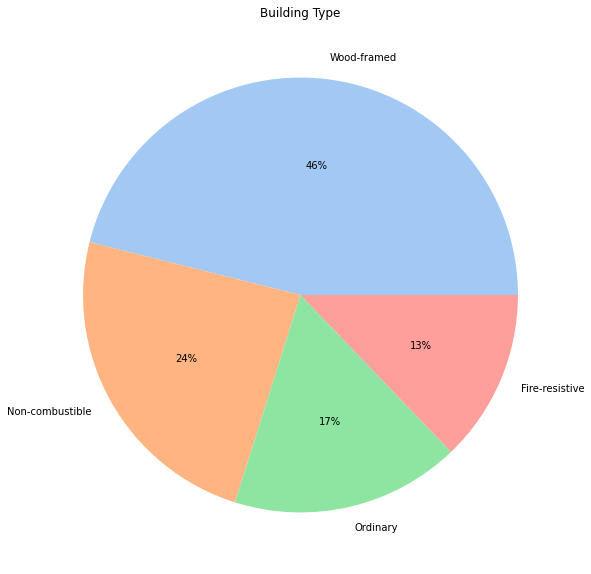

In [10]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,10))
plt.pie(train_data['Building_Type'].value_counts(), labels =train_data.Building_Type.unique(), colors = colors, autopct='%.0f%%')
plt.title("Building Type")
plt.show()

In [11]:
#matrice de corrélation
corr_matrix=train_data.corr()

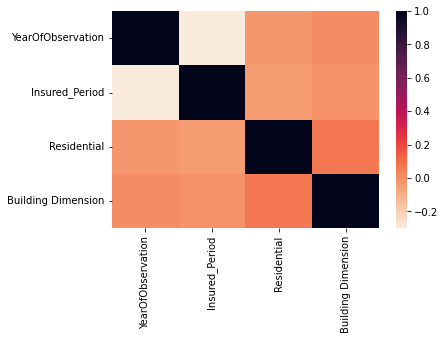

In [12]:
sns.heatmap(corr_matrix,cmap="rocket_r")
plt.show()

In [13]:
train_data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [14]:
train_data['Building Dimension']=train_data['Building Dimension'].fillna(train_data['Building Dimension'].mean())
test_data['Building Dimension']=test_data['Building Dimension'].fillna(test_data['Building Dimension'].mean())

In [15]:
train_data['Geo_Code']=train_data['Geo_Code'].fillna(train_data['Geo_Code'].mode()[0])
test_data['Geo_Code']=test_data['Geo_Code'].fillna(test_data['Geo_Code'].mode()[0])

In [16]:
train_data['Garden']=train_data['Garden'].fillna(train_data['Garden'].mode()[0])
test_data['Garden']=test_data['Garden'].fillna(test_data['Garden'].mode()[0])

In [17]:
train_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [18]:
test_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [19]:
#Encoder les colonnes non numériques
l = ["Building_Painted","Building_Fenced","Garden","Settlement","Building_Type","Claim"]
le = LabelEncoder()
for c in l:
    train_data[c] = le.fit_transform(train_data[c])
    test_data[c]= le.fit_transform(test_data[c])

In [20]:
train_data.NumberOfWindows = train_data.NumberOfWindows.replace(["without",">=10"],[0,10])
train_data.NumberOfWindows=[int(n) for n in train_data.NumberOfWindows]


test_data.NumberOfWindows = test_data.NumberOfWindows.replace(["without",">=10"],[0,10])
test_data.NumberOfWindows=[int(n) for n in test_data.NumberOfWindows]





In [21]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,0,1,1,1,1240.0,3,0,75117,0
1,H14962,2012,1.0,0,0,1,1,1,900.0,1,0,62916,0
2,H17755,2013,1.0,1,1,0,0,0,4984.0,1,4,31149,1
3,H13369,2016,0.5,0,0,1,1,1,600.0,3,0,6012,1
4,H12988,2012,1.0,0,0,1,1,1,900.0,1,0,57631,0


In [22]:
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,1,1,1,1,3760.0,0,0,43157,1
1,H16909,2015,1.0,0,1,0,0,0,1452.0,0,5,58194,0
2,H16867,2013,1.0,1,1,0,0,0,1944.0,2,6,92050,1
3,H14813,2015,1.0,0,0,1,1,1,2270.0,1,0,13209,1
4,H3728,2016,0.5,0,1,0,0,0,2976.0,0,9,5177,0


In [23]:
train_data["Claim"].value_counts()

0    3886
1    1126
Name: Claim, dtype: int64

In [24]:
Y_train = train_data.Claim
X_train = train_data.drop(columns=['Customer Id','Claim','YearOfObservation','Geo_Code'],axis=1) #features


In [25]:
smote = SMOTE(sampling_strategy={1:3000})
x_train,y_train= smote.fit_resample(X_train, Y_train)

In [26]:
x_train.nunique().sort_values()

Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building_Type            4
NumberOfWindows         11
Insured_Period         618
Building Dimension    2880
dtype: int64

In [27]:
corr_matrix=train_data.corr()
corr_matrix

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
YearOfObservation,1.000000,-0.301636,-0.025558,0.048231,-0.123026,-0.122836,-0.122646,0.005187,-0.002341,0.108055,-0.020188
Insured_Period,-0.301636,1.000000,-0.039430,-0.036210,0.015859,0.015622,0.016294,-0.010356,0.003199,-0.020290,0.070145
Residential,-0.025558,-0.039430,1.000000,-0.017048,-0.090274,-0.090012,-0.090621,0.066270,0.331869,0.133417,0.055220
Building_Painted,0.048231,-0.036210,-0.017048,1.000000,-0.578215,-0.578447,-0.578680,0.096291,-0.046469,0.495624,0.036031
Building_Fenced,-0.123026,0.015859,-0.090274,-0.578215,1.000000,0.999601,0.999202,-0.140850,-0.022468,-0.857857,-0.069308
Garden,-0.122836,0.015622,-0.090012,-0.578447,0.999601,1.000000,0.999601,-0.140783,-0.022389,-0.859088,-0.070050
Settlement,-0.122646,0.016294,-0.090621,-0.578680,0.999202,0.999601,1.000000,-0.140784,-0.022310,-0.858745,-0.069836
Building Dimension,0.005187,-0.010356,0.066270,0.096291,-0.140850,-0.140783,-0.140784,1.000000,0.007205,0.299424,0.286303
Building_Type,-0.002341,0.003199,0.331869,-0.046469,-0.022468,-0.022389,-0.022310,0.007205,1.000000,0.113581,0.114039
NumberOfWindows,0.108055,-0.020290,0.133417,0.495624,-0.857857,-0.859088,-0.858745,0.299424,0.113581,1.000000,0.155361


[0.15090988 0.02434274 0.04083935 0.02604327 0.00699527 0.00705499
 0.00674877 0.5672929  0.07285073 0.09692211]


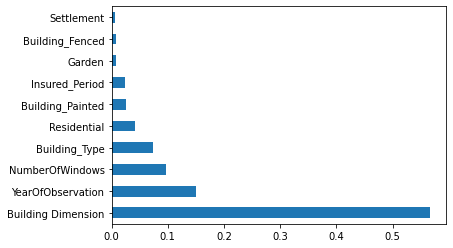

In [28]:
#check for feature importance for predicting the target variable
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(train_data.drop(['Customer Id','Claim','Geo_Code'],axis=1),train_data['Claim'])
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=train_data.drop(['Customer Id','Claim','Geo_Code'],axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [58]:
for i in range(len(feat_importances)):
    if feat_importances[i] < 0.01:
        print(feat_importances.index[i]," deleted with value: ",feat_importances[i])
        train_data.drop([feat_importances.index[i]],axis=1,inplace=True)
        test_data.drop([feat_importances.index[i]],axis=1,inplace=True)
        

Building_Fenced  deleted with value:  0.006995271585344977
Garden  deleted with value:  0.00705499372492111
Settlement  deleted with value:  0.00674876512585682


In [30]:
Y_train = train_data.Claim #target
X_train = train_data.drop(columns=['Customer Id','Claim','Geo_Code'],axis=1) #feature

In [59]:
Y_test =  test_data.Claim #target
X_test = test_data.drop(columns=['Customer Id','Claim','Geo_Code'],axis=1) #feature

In [32]:
X_train.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
dtype: int64

---

### **Ml Modul construction** 

In [33]:
#define scores, models, models_name 
scores=[]
models=[]
models_name=['KNN','LogisticRegression','DecisionTreeClass','RandomForestClass','GradientBoosting','XGB']

In [34]:
#define a grid function to determine best parameters for each model 
def grid_funct (model,param_grid,X_train,Y_train):
        grid=GridSearchCV(model,param_grid,cv=5)
        grid.fit(X_train,Y_train)
        print("score: ",grid.best_score_)
        print("estimatore: ",grid.best_estimator_)
        print("Parameters: ",grid.best_params_)
        scores.append(grid.best_score_)
        models.append(grid.best_estimator_)

In [35]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier(1)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print("score pour k=1: ",knn.score(X_test,Y_test))
knn=KNeighborsClassifier(1)
#grid search CV to find best parameters 
param_grid={'n_neighbors':list(range(1,31)),'p':list(range(1,11))}
grid_funct(knn,param_grid,X_train,Y_train)

score pour k=1:  0.6795528644620401
score:  0.7823224935970533
estimatore:  KNeighborsClassifier(n_neighbors=18, p=1)
Parameters:  {'n_neighbors': 18, 'p': 1}


In [36]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lr.fit(X_train,Y_train)
print('before Grid Serach CVd: ',cross_val_score(lr,X_test,Y_test,cv=5).mean())
lr=LogisticRegression(max_iter=10000)
#grid search
param_grid={"solver":['newton-cg', 'lbfgs','liblinear','sag','saga']}
grid_funct(lr,param_grid,X_train,Y_train)



before Grid Serach CVd:  0.7764362769013932


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:

score:  0.7914997522402851
estimatore:  LogisticRegression(max_iter=10000, solver='newton-cg')
Parameters:  {'solver': 'newton-cg'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


score before grid search:  0.775966464834653
score:  0.7877085310933467
estimatore:  DecisionTreeClassifier(max_depth=6, max_features=4, max_leaf_nodes=20)
Parameters:  {'max_depth': 6, 'max_features': 4, 'max_leaf_nodes': 20}


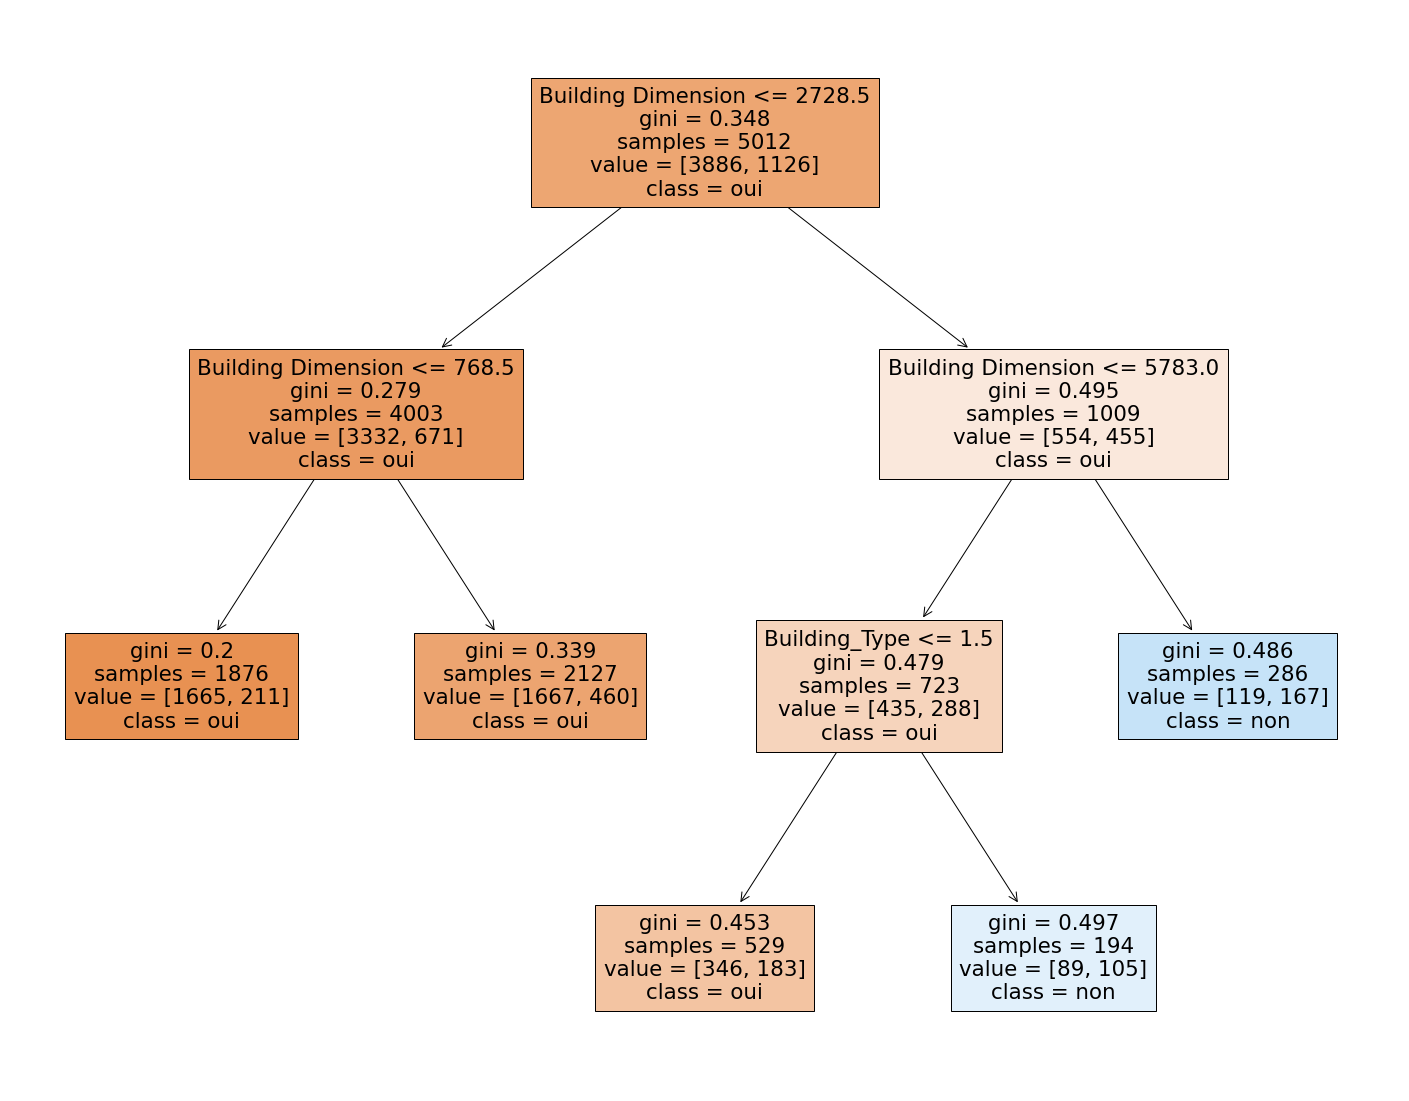

In [37]:
#decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(max_leaf_nodes=5)
dec_tree.fit(X_train,Y_train)
print("score before grid search: ",dec_tree.score(X_test,Y_test))
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree,
                   feature_names=X_test.columns,
                   class_names=['oui', "non"],
                   filled=True)
#grid search
dec_tree=DecisionTreeClassifier()
param_grid={'max_depth':list(range(1,30)),'max_features':list(range(1,8)),'max_leaf_nodes':[5,10,15,20,50,100,200,1000]}
grid_funct(dec_tree,param_grid,X_train,Y_train)



In [38]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=5)
rf.fit(X_train, Y_train)
print("score before grid search: ",rf.score(X_test,Y_test))
#parametre tuning using grid search
rf=RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)]
n_estimators
param_grid={'n_estimators':n_estimators,'max_features':list(range(1,8))}
grid_funct(rf,param_grid,X_train,Y_train)



score before grid search:  0.7317186772240335
score:  0.7535921178580028
estimatore:  RandomForestClassifier(max_features=5, n_estimators=200)
Parameters:  {'max_features': 5, 'n_estimators': 200}


In [39]:

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=5).fit(X_train,Y_train)
print('before : ',gb.score(X_test,Y_test))
#grid search
param_grid={"learning_rate": [0.01, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8]}
grid_funct(GradientBoostingClassifier(),param_grid,X_train,Y_train)

before :  0.7633907778295296
score:  0.7879077338841759
estimatore:  GradientBoostingClassifier(learning_rate=0.15, min_samples_leaf=0.2,
                           min_samples_split=0.5)
Parameters:  {'learning_rate': 0.15, 'max_depth': 3, 'min_samples_leaf': 0.2, 'min_samples_split': 0.5}


In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
print('before:',xgb.score(X_test,Y_test))
#grid search
param_grid={'min_child_weight':[1, 5, 10],
        'gamma':[0.5, 1, 1.5, 2, 5],
        'subsample':[0.6, 0.8, 1.0],
        'colsample_bytree':[0.6, 0.8, 1.0],
        'max_depth':[3, 4, 5]}

grid_funct(XGBClassifier(),param_grid,X_train,Y_train)

before: 0.7638565440149045
score:  0.7916985570235401
estimatore:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
Parameters:  {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 1.0}


In [41]:
scores

[0.7823224935970533,
 0.7914997522402851,
 0.7877085310933467,
 0.7535921178580028,
 0.7879077338841759,
 0.7916985570235401]

In [42]:
models

[KNeighborsClassifier(n_neighbors=18, p=1),
 LogisticRegression(max_iter=10000, solver='newton-cg'),
 DecisionTreeClassifier(max_depth=6, max_features=4, max_leaf_nodes=20),
 RandomForestClassifier(max_features=5, n_estimators=200),
 GradientBoostingClassifier(learning_rate=0.15, min_samples_leaf=0.2,
                            min_samples_split=0.5),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
               missing=nan, monotone_constraints='()', n_estimators=100,
  

---

### **Validation & Interpretation** 

In [43]:
for i in range(6):
    print(models_name[i],": ",scores[i])

KNN :  0.7823224935970533
LogisticRegression :  0.7914997522402851
DecisionTreeClass :  0.7877085310933467
RandomForestClass :  0.7535921178580028
GradientBoosting :  0.7879077338841759
XGB :  0.7916985570235401


#### => XGB est le meilleure classificateur avec un score de 0.79

## Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
for i in models:
    y_pred=i.predict(X_test)
    mat=confusion_matrix(Y_test,y_pred)
    print(mat)


[[1575   64]
 [ 434   74]]
[[1603   36]
 [ 439   69]]
[[1585   54]
 [ 445   63]]
[[1466  173]
 [ 386  122]]
[[1571   68]
 [ 430   78]]
[[1575   64]
 [ 419   89]]


### =>The model correctly predict TP: true positive but not TN , a hypothesis to test in unbalanced training data

In [48]:
Y_train.value_counts()

0    3886
1    1126
Name: Claim, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
print('before:',xgb.score(X_test,Y_test))
#grid search
param_grid={'min_child_weight':[1, 5, 10],
        'gamma':[0.5, 1, 1.5, 2, 5],
        'subsample':[0.6, 0.8, 1.0],
        'colsample_bytree':[0.6, 0.8, 1.0],
        'max_depth':[3, 4, 5]}

grid_funct(XGBClassifier(),param_grid,X_res, y_res)


before: 0.7638565440149045
score:  0.7757513232111303
estimatore:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
Parameters:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


[KNeighborsClassifier(n_neighbors=18, p=1),
 LogisticRegression(max_iter=10000, solver='newton-cg'),
 DecisionTreeClassifier(max_depth=6, max_features=4, max_leaf_nodes=20),
 RandomForestClassifier(max_features=5, n_estimators=200),
 GradientBoostingClassifier(learning_rate=0.15, min_samples_leaf=0.2,
                            min_samples_split=0.5),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
               missing=nan, monotone_constraints='()', n_estimators=100,
  